# INTRODCTION

ĐÂY LÀ BỘ DỮ LIỆU VỀ THÔNG TIN CÁC CĂN HỘ Ở THÀNH PHỐ MELBOURNE

# PREPROCESS DATA

In [4]:
import pandas as pd
df = pd.read_csv("Downloads/Melbourne_housing_FULL.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


- Data not clean and have much NaN variable

In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [2]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

- Drop buildingArea, YearBuilt vì số lượng missing value quá lớn 

In [5]:
df =df.drop(columns = ['BuildingArea','YearBuilt'],axis=1)

In [6]:
df = df.dropna(subset = ['Price'])

In [8]:
df = df.fillna(method = 'bfill')

In [9]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

- Drop tất cả row là NaN trong feature Price vì đây là target ta cần xây dựng model 
- fillna lấp các giá trị NaN trong các feature còn lại bằng giá trị đứng sau nó
- data không còn NaN variable -> đã có thể visulization 

In [10]:
df.nunique()

Suburb             345
Address          26751
Rooms               12
Type                 3
Price             2871
Method               5
SellerG            349
Date                78
Distance           213
Postcode           209
Bedroom2            14
Bathroom            10
Car                 13
Landsize          1557
CouncilArea         33
Lattitude        11366
Longtitude       12275
Regionname           8
Propertycount      336
dtype: int64

không có gì bất thường 

# EXPLORE DATA 

In [11]:
df_Y = df.Price
df_X = df.drop(columns=['Price','Address','Date'],axis= 1)

Cắt Price để làm y còn lại là X 
Drop Address,Date vì số lượng unique quá lớn và lại là kiểu object nên sẽ ảnh hưởng tới mô hình 

In [12]:
df_X.nunique()

Suburb             345
Rooms               12
Type                 3
Method               5
SellerG            349
Distance           213
Postcode           209
Bedroom2            14
Bathroom            10
Car                 13
Landsize          1557
CouncilArea         33
Lattitude        11366
Longtitude       12275
Regionname           8
Propertycount      336
dtype: int64

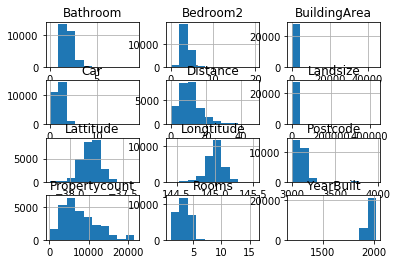

In [80]:
hist = df_X.hist()

Đồ thị của 1 số fearture có kiểu là number

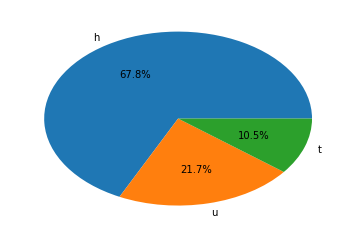

In [90]:
import matplotlib.pyplot as plt
plt.pie(df.Type.value_counts().values,labels = df.Type.value_counts().index,autopct='%1.1f%%')
plt.show()

đồ thị của Type house

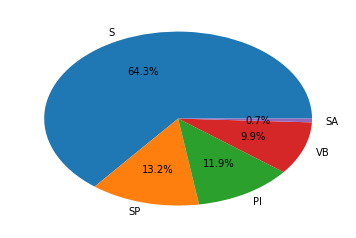

In [92]:
plt.pie(df.Method.value_counts().values,labels = df.Method.value_counts().index,autopct='%1.1f%%')
plt.show()

Đồ thị Method House

In [22]:
X = pd.get_dummies(df_X,columns=['Suburb','Type','Method','SellerG','CouncilArea','Regionname'])
X.dtypes

Rooms                                      int64
Distance                                 float64
Postcode                                 float64
Bedroom2                                 float64
Bathroom                                 float64
                                          ...   
Regionname_Northern Victoria               uint8
Regionname_South-Eastern Metropolitan      uint8
Regionname_Southern Metropolitan           uint8
Regionname_Western Metropolitan            uint8
Regionname_Western Victoria                uint8
Length: 753, dtype: object

Thực hiện OneHotEncoding cho các feature Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname

In [68]:
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.06666667, 0.05197505, 0.06850716, ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.05197505, 0.06850716, ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.05197505, 0.06850716, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06666667, 0.13097713, 0.01329243, ..., 0.        , 1.        ,
        0.        ],
       [0.13333333, 0.13097713, 0.01329243, ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 0.13097713, 0.01329243, ..., 0.        , 1.        ,
        0.        ]])

scale data lại trong khoảng 0->1 và chuyển data lại thành dạng matrix 

In [105]:
import numpy as np
y = []
for i in df_Y:
    y.append(float((i-min(df_Y))/(max(df_Y)-min(df_Y))))
y

[0.12550607287449392,
 0.08547008547008547,
 0.1241565452091768,
 0.06882591093117409,
 0.13630229419703105,
 0.07701304543409807,
 0.16113360323886639,
 0.13954116059379218,
 0.08232118758434548,
 0.059379217273954114,
 0.019343229869545658,
 0.09104813315339631,
 0.04111560953666217,
 0.06072874493927125,
 0.03562753036437247,
 0.0553306342780027,
 0.1138101664417454,
 0.05982905982905983,
 0.17094017094017094,
 0.03733693207377418,
 0.09784075573549257,
 0.032028789923526764,
 0.11021142600089968,
 0.100314889788574,
 0.06855600539811066,
 0.09820062977957715,
 0.07827260458839407,
 0.0724246513720198,
 0.11201079622132254,
 0.07332433648223122,
 0.09041835357624832,
 0.03733693207377418,
 0.09131803868645974,
 0.1106612685560054,
 0.03553756185335133,
 0.03045434098065677,
 0.030679262258209626,
 0.1225820962663068,
 0.03346828609986505,
 0.09446693657219973,
 0.0553306342780027,
 0.13108412055780477,
 0.07890238416554206,
 0.10841205578047683,
 0.10841205578047683,
 0.034637876743

Tương tự scale target lại trong khoảng 0->1 

In [55]:
x_scaled.shape

(27247, 753)

Data hiện tại có 753 chiều -> dùng PCA giảm thành 2 chiều 

In [118]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
data = pca.fit_transform(x_scaled)

In [119]:
print(data[:10])

[[-0.65560121]
 [-0.65452155]
 [-0.51418587]
 [-0.46759518]
 [-0.56074718]
 [-0.60152978]
 [-0.76744928]
 [-0.76490126]
 [-0.60353543]
 [-0.04941749]]


data sau khi pca chỉ còn 2 chiều 

In [120]:
pca.explained_variance_ratio_

array([0.09066422])

câu hỏi: tại sao explained ratio lại thấp vậy ? 

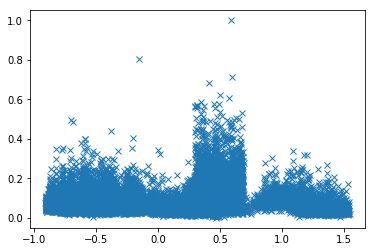

In [125]:
plot_X = data.tolist()
import matplotlib.pyplot as plt
plt.plot(plot_X,y,'x')
plt.show()

# MODEL TRAINNING 

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(data,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train_pca,y_train_pca)
y_pred_pca= linear.predict(X_test_pca)
print(mean_squared_error(y_test_pca,y_pred_pca))

0.003389125933261581


Khi train bằng data đã PCA thì cho ra kết quả khá tốt , MSE = 0.0033

In [123]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))

5.757369796484165e+18


khi train bằng data không PCA thì ra kết quả không thể chấp nhận được .
có thể là vì có nhiều giá trị hoặc là 0 hoặc là 1 làm cho data cực nhiễu -> mô hình bị overfit 
PCA làm giảm số chiều data -> sự ảnh hưởng của những feature 0,1 giảm -> mô hình tốt hơn hẳn khi không sử dụng PCA 

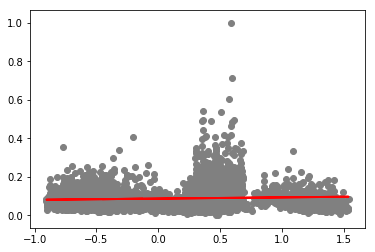

In [126]:
plt.scatter(X_test_pca, y_test_pca,  color='gray')
plt.plot(X_test_pca, y_pred_pca, color='red', linewidth=2)
plt.show()

# KẾT LUẬN 

- ĐÂY LÀ 1 BỘ DATA CỰC NHIỄU CẦN PHẢI DÙNG NHIỀU PHƯƠNG PHÁP ĐỂ XỬ LÝ 
- PCA LÀM VIỆC TUYỆT VỜI TRONG TÌNH HUỐNG NÀY 
- MISSING VALUE CỦA PRICE CÓ THỂ DÙNG MÔ HÌNH NÀY ĐỂ DỰ ĐOÁN 